In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_excel('filtered_results.xlsx', index_col='Year', parse_dates=True)

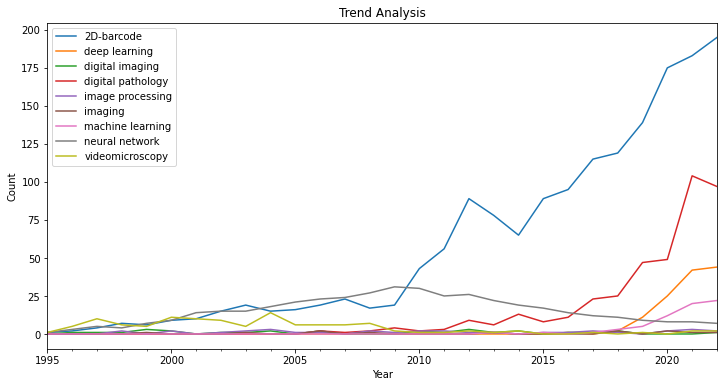

In [ ]:
# plot the data
df.plot(figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Trend Analysis')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tabulate import tabulate

# Load data from CSV file
data = pd.read_excel('filtered_results.xlsx', index_col=0)

# Define function for each curve fit
def linear(x, a, b):
    return a * x + b

def exponential(x, a, b, c):
    return a * np.exp(b * x) + c

def logarithmic(x, a, b):
    return a * np.log(x) + b

def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

def cyclical(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# Define a function to fit each curve to the data and calculate performance metrics
def fit_curve(data, func):
    y = data.values
    x = np.arange(len(y))

    # Fit the curve
    popt, pcov = curve_fit(func, x, y)

    # Calculate predicted values of y
    y_pred = func(x, *popt)

    # Calculate R^2, RMSE, MAE, and MSE
    r2 = r2_score(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Return x, y, parameters, R^2, and RMSE
    return x, y, popt, r2, rmse, mae, mse

# Loop over each column (i.e., keyword) and fit each curve to the data
results = {}
for col in data.columns:
    curve_fits = []
    for func in [linear, exponential, logarithmic, quadratic, cyclical]:
        try:
            x, y, params, r2, rmse, mae, mse = fit_curve(data[col], func)
            curve_fits.append({'function': func.__name__, 'x': x, 'y': y, 'params': params, 'r2': r2, 'rmse': rmse, 'mae': mae, 'mse': mse})
        except:
            continue
    results[col] = curve_fits

# Print results in a table
table_data = []
for col, curve_fits in results.items():
    for curve_fit in curve_fits:
        row = [col, curve_fit["function"], f'{curve_fit["r2"]:.4f}', f'{curve_fit["rmse"]:.4f}', f'{curve_fit["mae"]:.4f}', f'{curve_fit["mse"]:.4f}'] + list(curve_fit["params"])
        table_data.append(row)

headers = ['Keyword', 'Curve', 'R^2', 'RMSE', 'MAE', 'MSE', 'Param 1', 'Param 2', 'Param 3', 'Param 4']
table = tabulate(table_data, headers=headers, tablefmt='rst')
print(table)


=================  ===========  ======  =======  =======  ========  ============  ===========  ==========  =========
Keyword            Curve           R^2     RMSE      MAE       MSE       Param 1      Param 2     Param 3    Param 4
=================  ===========  ======  =======  =======  ========  ============  ===========  ==========  =========
2D-barcode         linear       0.8386  23.7468  19.4655  563.91     6.70088      -32.4975
2D-barcode         exponential  0.9757   9.2233   6.3954   85.0699  10.2837         0.112599   -11.0664
2D-barcode         quadratic    0.9732   9.6714   7.4241   93.5359   0.372332      -3.35208     11.0653
deep learning      linear       0.3371   9.6001   7.008    92.1611   0.847564      -6.97783
deep learning      exponential  0.9392   2.9063   1.7201    8.4465   0.000369182    0.438061    -0.627609
deep learning      quadratic    0.6752   6.7205   5.2611   45.1651   0.11769       -2.33006      6.79187
deep learning      cyclical     0.1762  10.702 

C:\Users\saeed\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
C:\Users\saeed\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\saeed\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
C:\Users\saeed\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\saeed\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
C:\Users\saeed\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\saeed\AppData\Roaming\Python\Python36\site-packages\ipykernel_launc

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# calculate mean absolute error (MAE)
mae = mean_absolute_error(df['deep learning'], model_fit.predict())

# calculate R2 score
r2 = r2_score(df['deep learning'], model_fit.predict())

# calculate root mean squared error (RMSE)
mse = mean_squared_error(df['deep learning'], model_fit.predict())
rmse = np.sqrt(mse)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 score:", r2)

MAE: 2.56868309641987
RMSE: 5.593121523136919
R2 score: 0.7749981324908423


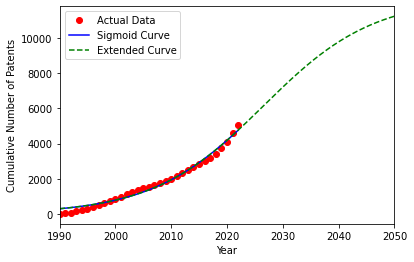

Growth Time (10% to 50%): 17
1% Year: 1981
10% Year: 2004
50% Year: 2026
90% Year: 2048
Midpoint: 2026.5227335226452
Growth Time from 100 patents to 1.000.000 patents: 91.05792043599719
Saturation: 12282.338551662451
R^2: 0.9843235119927449
P-value: 0.04608595286150844
RMSE: 171.59231010273282
Growth Time (10% to 50%): 17
Maximum values:
L: 230893.5716528463
k: 0.18856597541737494
x0: 2068.3686279039284

Minimum values:
L: 3108.4659371006446
k: 0.07865937229594562
x0: 2005.7193464616328


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy import stats

# Define the logistic sigmoid function
def sigmoid(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Load the dataset from Excel
data = pd.read_excel('c:/users/saeed/downloads/patents.xlsx')

# Extract the year and cumulative patent columns
year = data['Year']
cumulative_patents = data['Cumulative Patents']

# Fit the sigmoid curve to the data
p0 = [max(cumulative_patents), 1, np.median(year)]  # Initial guess for the parameters
params, _ = curve_fit(sigmoid, year, cumulative_patents, p0=p0)

# Extract the parameters
L, k, x0 = params

# Generate the curve
curve_years = np.linspace(min(year), max(year), 100)
curve_values = sigmoid(curve_years, L, k, x0)

# Bootstrap to calculate confidence intervals
num_bootstrap = 1000
bootstrap_params = []
np.random.seed(0)  # For reproducibility

for _ in range(num_bootstrap):
    # Resample the data
    resampled_indices = np.random.choice(len(year), size=len(year), replace=True)
    resampled_year = year[resampled_indices]
    resampled_cumulative_patents = cumulative_patents[resampled_indices]

    try:
        # Fit the sigmoid curve to the resampled data
        resampled_params, _ = curve_fit(sigmoid, resampled_year, resampled_cumulative_patents, p0=p0)

        bootstrap_params.append(resampled_params)
    except RuntimeError:
        continue

# Calculate the confidence intervals
confidence_level = 0.95
lower_percentile = (1 - confidence_level) / 2
upper_percentile = 1 - lower_percentile
lower_params = np.percentile(bootstrap_params, lower_percentile * 100, axis=0)
upper_params = np.percentile(bootstrap_params, upper_percentile * 100, axis=0)

# Calculate the threshold years
thresholds = [0.01, 0.1, 0.5, 0.9]
threshold_years = [x0 - np.log((1 - t) / t) / k for t in thresholds]

# Extend the curve for visualization
extended_years = np.linspace(min(year), 2050, 500)
extended_curve_values = sigmoid(extended_years, L, k, x0)

# Plot the data, curve, and extended curve
plt.plot(year, cumulative_patents, 'ro', label='Actual Data')
plt.plot(curve_years, curve_values, 'b-', label='Sigmoid Curve')
plt.plot(extended_years, extended_curve_values, 'g--', label='Extended Curve')

# Set x-axis limit
plt.xlim(min(year), 2050)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Patents')
plt.legend()

# Display the plot
plt.show()


# Calculate the midpoint, growth time, and saturation
midpoint = x0
growth_time = np.log(10**6 / 100) / k
saturation = L

# Find the years corresponding to 10% and 50% of the cumulative number of patents
year_10 = year[np.argmin(np.abs(sigmoid(year, L, k, x0) - 0.1 * L))]
year_50 = year[np.argmin(np.abs(sigmoid(year, L, k, x0) - 0.5 * L))]

# Calculate the growth time from 10% to 50%
growth_time_10_50 = year_50 - year_10

print('Growth Time (10% to 50%):', growth_time_10_50)

# Calculate R^2
r2 = r2_score(cumulative_patents, sigmoid(year, L, k, x0))

# Calculate P-value and RMSE
residuals = cumulative_patents - sigmoid(year, L, k, x0)
_, p_value = stats.normaltest(residuals)
rmse = np.sqrt(np.mean(residuals**2))

# Print the calculated threshold years
for t, year in zip(thresholds, threshold_years):
    print(f'{int(t*100)}% Year: {int(year)}')

# Print the results
print('Midpoint:', midpoint)
print('Growth Time from 100 patents to 1.000.000 patents:', growth_time)
print('Saturation:', saturation)
print('R^2:', r2)
print('P-value:', p_value)
print('RMSE:', rmse)
print('Growth Time (10% to 50%):', growth_time_10_50)

# Calculate the maximum and minimum values for all parameters
params_all = np.concatenate((bootstrap_params, [params]), axis=0)
params_min = np.amin(params_all, axis=0)
params_max = np.amax(params_all, axis=0)

# Print the maximum and minimum values for all parameters
print('Maximum values:')
print('L:', params_max[0])
print('k:', params_max[1])
print('x0:', params_max[2])
print('\nMinimum values:')
print('L:', params_min[0])
print('k:', params_min[1])
print('x0:', params_min[2])